In [1]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [25]:
#input
wind_speed = ctrl.Antecedent(np.arange(0.7, 3.3, 0.1), 'wind_speed')
temperature  = ctrl.Antecedent(np.arange(20.4, 41.3, 0.2), 'temperature')
#ouput
rainfall   = ctrl.Consequent(np.arange(0.2, 3.6, 0.1), 'rainfall')

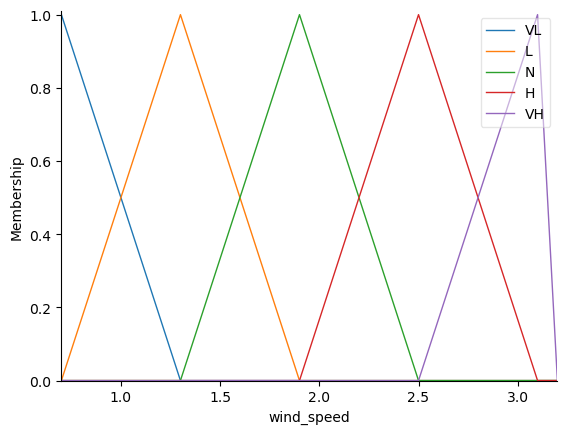

In [26]:
wind_speed['VL'] = fuzz.trimf(wind_speed.universe, [0.7, 0.7, 1.3])
wind_speed['L']  = fuzz.trimf(wind_speed.universe, [0.7, 1.3, 1.9])
wind_speed['N']  = fuzz.trimf(wind_speed.universe, [1.3, 1.9, 2.5])
wind_speed['H']  = fuzz.trimf(wind_speed.universe, [1.9, 2.5, 3.1])
wind_speed['VH'] = fuzz.trimf(wind_speed.universe, [2.5, 3.1, 3.1])
wind_speed.view()

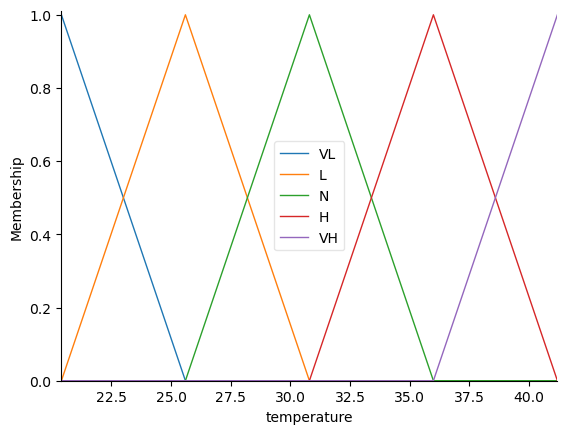

In [27]:
temperature['VL'] = fuzz.trimf(temperature.universe, [20.4, 20.4, 25.6])
temperature['L']  = fuzz.trimf(temperature.universe, [20.4, 25.6, 30.8])
temperature['N']  = fuzz.trimf(temperature.universe, [25.6, 30.8, 36])
temperature['H']  = fuzz.trimf(temperature.universe, [30.8, 36, 41.2])
temperature['VH'] = fuzz.trimf(temperature.universe, [36, 41.2, 41.2])
temperature.view()

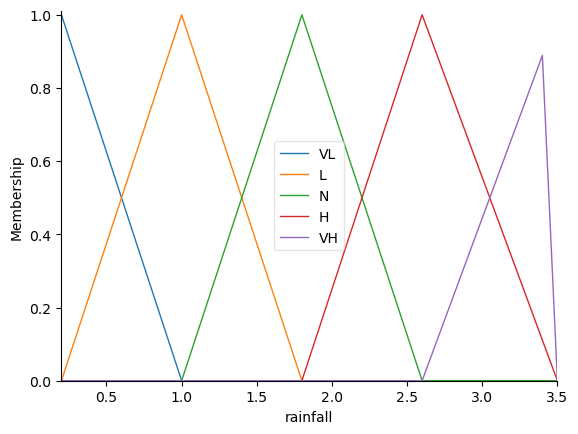

In [31]:
rainfall['VL'] = fuzz.trimf(rainfall.universe, [0.2, 0.2, 1])
rainfall['L']  = fuzz.trimf(rainfall.universe, [0.2, 1, 1.8])
rainfall['N']  = fuzz.trimf(rainfall.universe, [1, 1.8, 2.6])
rainfall['H']  = fuzz.trimf(rainfall.universe, [1.8, 2.6, 3.5])
rainfall['VH'] = fuzz.trimf(rainfall.universe, [2.6, 3.5, 3.5])
rainfall.view()

In [41]:
rule1 = ctrl.Rule(wind_speed['VL']&temperature['VL'],rainfall['VL'])
rule2 = ctrl.Rule(wind_speed['VL']&temperature['L'],rainfall['VL'])
rule3 = ctrl.Rule(wind_speed['VL']&temperature['N'],rainfall['L'])
rule4 = ctrl.Rule(wind_speed['VL']&temperature['H'],rainfall['L'])
rule5 = ctrl.Rule(wind_speed['VL']&temperature['VH'],rainfall['N'])
rule6 = ctrl.Rule(wind_speed['L']&temperature['VL'],rainfall['VL'])
rule7 = ctrl.Rule(wind_speed['L']&temperature['L'],rainfall['L'])
rule8 = ctrl.Rule(wind_speed['L']&temperature['N'],rainfall['L'])
rule9 = ctrl.Rule(wind_speed['L']&temperature['H'],rainfall['N'])
rule10= ctrl.Rule(wind_speed['L']&temperature['VH'],rainfall['N'])
rule11= ctrl.Rule(wind_speed['N']&temperature['VL'],rainfall['L'])
rule12= ctrl.Rule(wind_speed['N']&temperature['L'],rainfall['L'])
rule13= ctrl.Rule(wind_speed['N']&temperature['N'],rainfall['N'])
rule14= ctrl.Rule(wind_speed['N']&temperature['H'],rainfall['N'])
rule15= ctrl.Rule(wind_speed['N']&temperature['VH'],rainfall['H'])
rule16= ctrl.Rule(wind_speed['H']&temperature['VL'],rainfall['L'])
rule17= ctrl.Rule(wind_speed['H']&temperature['L'],rainfall['N'])
rule18= ctrl.Rule(wind_speed['H']&temperature['N'],rainfall['N'])
rule19= ctrl.Rule(wind_speed['H']&temperature['H'],rainfall['H'])
rule20= ctrl.Rule(wind_speed['H']&temperature['VH'],rainfall['VH'])
rule21= ctrl.Rule(wind_speed['VH']&temperature['VL'],rainfall['N'])
rule22= ctrl.Rule(wind_speed['VH']&temperature['L'],rainfall['H'])
rule23= ctrl.Rule(wind_speed['VH']&temperature['N'],rainfall['H'])
rule24= ctrl.Rule(wind_speed['VH']&temperature['H'],rainfall['VH'])
rule25= ctrl.Rule(wind_speed['VH']&temperature['VH'],rainfall['VH'])

0.8878482381859563


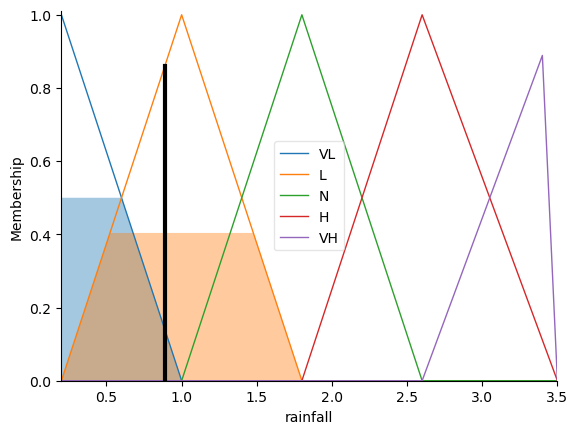

In [43]:
Rain_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
#chương trình học Rule 1-8
Rain = ctrl.ControlSystemSimulation(Rain_ctrl)
#input
Rain.input['wind_speed']=1
Rain.input['temperature']=22.5

Rain.compute()
print(Rain.output['rainfall'])
rainfall.view(sim=Rain)